#### LDA : Latent Dirichlet Allocation

LDA is a probabilistic model to find cluster assignments for documents.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
headline_df = pd.read_csv('abcnews-date-text.csv')
headline_df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [3]:
headline_df.shape

(1226258, 2)

In [5]:
NUM_SAMPLES = 10000
df = headline_df.sample(NUM_SAMPLES,replace=False).reset_index(drop=True)

In [6]:
df.shape

(10000, 2)

In [8]:
X = df['headline_text']
X.head(10)

0      funding allocated to help protect king is brand
1                    wind farm planned near mt gambier
2    trevor ruthenberg apologises for wrongly claiming
3              rio mayor wants pokemon go for olympics
4                              swan warns of more cuts
5                             all steady on jobs front
6            english cricket severs ties with stanford
7    green rearranging the deckchairs on the rms fa...
8           rogers waits for verdict on assault claims
9                               dont blame the captain
Name: headline_text, dtype: object

In [9]:
cv = CountVectorizer(ngram_range=(2,2))

tcv = cv.fit_transform(X)

In [10]:
tcv

<10000x45018 sparse matrix of type '<class 'numpy.int64'>'
	with 55290 stored elements in Compressed Sparse Row format>

In [12]:
feature_names = cv.get_feature_names()

In [13]:
feature_names[1000:1009]

['adrift for',
 'adrift in',
 'ads dishonest',
 'ads point',
 'adult disneyland',
 'adult store',
 'adults and',
 'adults study',
 'advance for']

In [17]:
NUM_TOPICS = 20

lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS,max_iter=20)
lda = lda_model.fit_transform(tcv)

### LDA - Document topic matrix

In [18]:
lda.shape

(10000, 20)

In [22]:
lda[6:9]

array([[0.84166667, 0.00833333, 0.00833333, 0.00833333, 0.00833333,
        0.00833333, 0.00833333, 0.00833333, 0.00833333, 0.00833333,
        0.00833333, 0.00833333, 0.00833333, 0.00833333, 0.00833333,
        0.00833333, 0.00833333, 0.00833333, 0.00833333, 0.00833333],
       [0.00625   , 0.00625   , 0.00625   , 0.00625   , 0.00625   ,
        0.00625   , 0.00625   , 0.00625   , 0.00625   , 0.00625   ,
        0.00625   , 0.00625   , 0.00625   , 0.00625   , 0.00625   ,
        0.00625   , 0.00625   , 0.00625   , 0.00625   , 0.88125   ],
       [0.00714286, 0.00714286, 0.00714286, 0.00714286, 0.00714286,
        0.00714286, 0.00714286, 0.00714286, 0.00714286, 0.00714286,
        0.00714286, 0.00714286, 0.00714286, 0.00714286, 0.86428571,
        0.00714286, 0.00714286, 0.00714286, 0.00714286, 0.00714286]])

In [23]:
sum(lda[9])

1.0000000000000004

In [19]:
lda_model.components_.shape

(20, 45018)

In [24]:
def print_topic(identifier, top_words = 10):
    
    for topic_id, topic_words_prob in enumerate(lda_model.components_):
        if topic_id == identifier:
            print(f'Topic ID : {topic_id}')
            
            top_feature_names = [feature_names[i] for i in topic_words_prob.argsort()[: -top_words-1 : -1]]
            
            print(' '.join(top_feature_names))

In [25]:
for i in range(14):
    print_topic(i, top_words=3)

Topic ID : 0
to be urged to calls for
Topic ID : 1
call for country hour to be
Topic ID : 2
to be in the urged to
Topic ID : 3
out of to be for the
Topic ID : 4
abc sport to be abc entertainment
Topic ID : 5
found in out of murder of
Topic ID : 6
finance with alan kohler with alan
Topic ID : 7
on the search for police search
Topic ID : 8
jailed for out of in nsw
Topic ID : 9
streaming updates live streaming to be
Topic ID : 10
calls for wall street at the
Topic ID : 11
the drum covid 19 to be
Topic ID : 12
call for calls for to the
Topic ID : 13
in the to be charged over


In [26]:
topics = []

for i in range(NUM_SAMPLES):
    topics.append(lda[i].argmax())

In [27]:
df['topic'] = topics

df.head()

,publish_date,headline_text,topic
0,20050302,funding allocated to help protect king is brand,18
1,20091002,wind farm planned near mt gambier,5
2,20180718,trevor ruthenberg apologises for wrongly claiming,2
3,20160714,rio mayor wants pokemon go for olympics,19
4,20120924,swan warns of more cuts,8


In [28]:
print_topic(18, top_words=3)

Topic ID : 18
set to to be to help


In [30]:
df['headline_text'][0]

'funding allocated to help protect king is brand'

In [31]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,init='pca',random_state=0)

In [32]:
lda_2d_tsne = tsne.fit_transform(lda)

In [33]:
lda_df_tsne = pd.DataFrame(lda_2d_tsne)

lda_df_tsne.shape

(10000, 2)

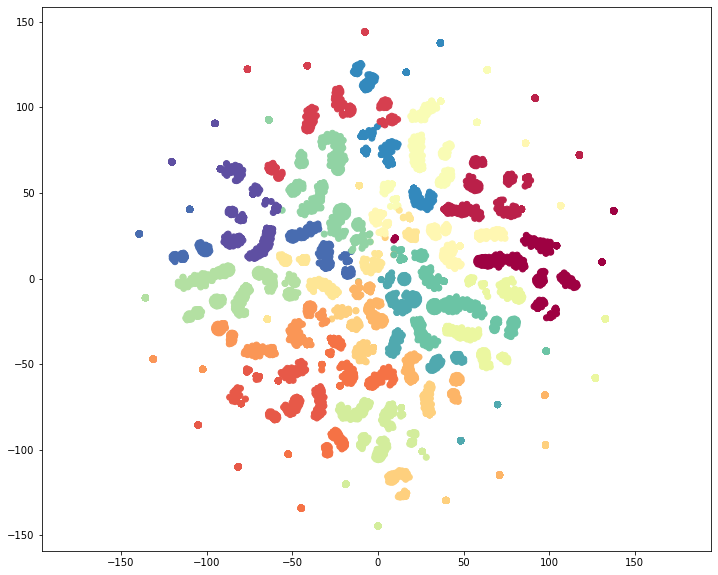

In [36]:
plt.subplots(figsize=(12,10))

plt.axis('equal');

plt.scatter(lda_df_tsne[0],lda_df_tsne[1],c=df['topic'],cmap=plt.cm.Spectral);